In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [59]:
# Load data
df = pd.read_csv(
    r"C:\Users\harag\Downloads\DA_outbound_call_nursing_team.csv"
)

df.head()


,patient_id,screening_type,screening_completed_ind,latest_call_date,reached_ind,screening_date
0,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-12-12
1,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-09-21
2,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-10-22
3,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-10-01
4,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-12-12


In [60]:
df['patient_id'].isna().sum()


np.int64(0)

In [61]:
df.shape

(1988, 6)

In [62]:
df['screening_type'].value_counts()


screening_type
COL    838
CBP    421
BCS    359
EED    339
OMW     30
A1C      1
Name: count, dtype: int64

In [63]:
# Remove invalid screening type (A1C)
valid_screenings = ['BCS', 'COL', 'CBP', 'OMW', 'EED']
df = df[df['screening_type'].isin(valid_screenings)]


In [65]:
df['screening_completed_ind'].value_counts(dropna=False)


screening_completed_ind
1.0    1120
NaN     613
0.0     249
s         5
Name: count, dtype: int64

In [66]:
# Clean invalid values
df['screening_completed_ind'] = df['screening_completed_ind'].replace('s', np.nan)

# Convert to numeric
df['screening_completed_ind'] = df['screening_completed_ind'].astype(float)



In [67]:
df['reached_ind'].value_counts(dropna=False)


reached_ind
1.0              1176
0.0               562
NaN               248
1 and reached       1
Name: count, dtype: int64

In [68]:
# Standardize reached indicator
df['reached_ind'] = df['reached_ind'].replace('1 and reached', '1')
df['reached_ind'] = df['reached_ind'].astype(float)
df.head()


,patient_id,screening_type,screening_completed_ind,latest_call_date,reached_ind,screening_date
0,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-12-12
1,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-09-21
2,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-10-22
3,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-10-01
4,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-12-12


In [69]:
df['latest_call_date'] = pd.to_datetime(df['latest_call_date'])
df['screening_date'] = pd.to_datetime(df['screening_date'])


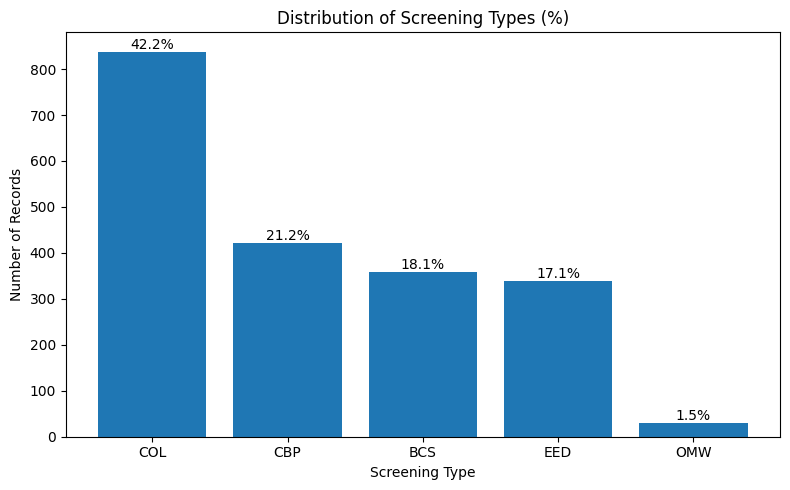

In [70]:
# Calculate counts and percentages
screening_counts = df['screening_type'].value_counts()
screening_pct = screening_counts / screening_counts.sum() * 100

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(screening_counts.index, screening_counts.values)

# Add percentage labels
for bar, pct in zip(bars, screening_pct):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{pct:.1f}%",
        ha='center',
        va='bottom'
    )

plt.title("Distribution of Screening Types (%)")
plt.xlabel("Screening Type")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()


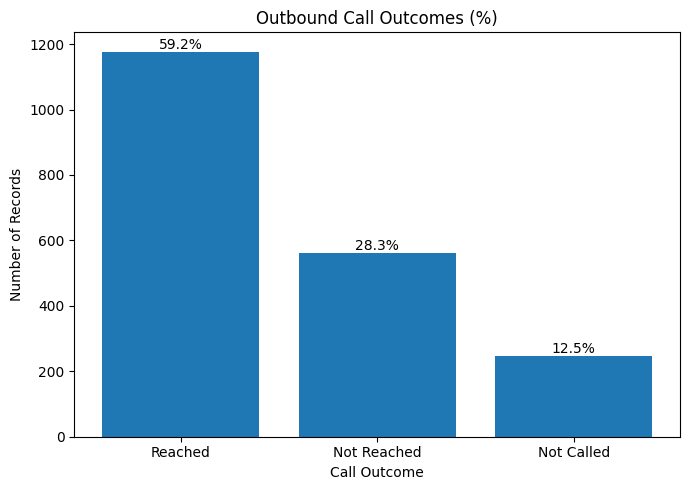

In [71]:
# Prepare data
reach_counts = df['reached_ind'].fillna('Not Called').value_counts()
reach_pct = reach_counts / reach_counts.sum() * 100

labels = ['Reached', 'Not Reached', 'Not Called']

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, reach_counts.values)

# Add percentage labels
for bar, pct in zip(bars, reach_pct):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{pct:.1f}%",
        ha='center',
        va='bottom'
    )

plt.title("Outbound Call Outcomes (%)")
plt.xlabel("Call Outcome")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()


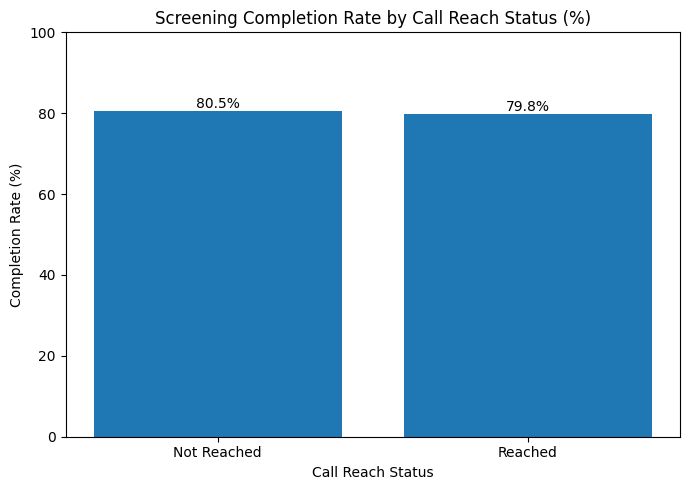

In [72]:
# Calculate completion rates
completion_by_reach = (
    df.groupby('reached_ind')['screening_completed_ind']
    .mean() * 100
)

labels = ['Not Reached', 'Reached']

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, completion_by_reach.values)

# Add percentage labels
for bar, value in zip(bars, completion_by_reach.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{value:.1f}%",
        ha='center',
        va='bottom'
    )

plt.title("Screening Completion Rate by Call Reach Status (%)")
plt.xlabel("Call Reach Status")
plt.ylabel("Completion Rate (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [73]:
# Count eligible screenings per patient
eligible_counts = (
    df.groupby('patient_id')['screening_completed_ind']
    .apply(lambda x: x.notna().sum())
    .reset_index(name='num_eligible_screenings')
)

# Merge back
df = df.merge(eligible_counts, on='patient_id', how='left')


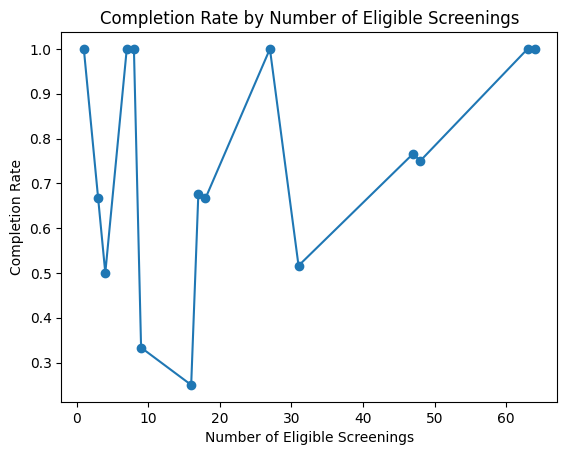

In [74]:
df.groupby('num_eligible_screenings')['screening_completed_ind'].mean().plot(
    kind='line',
    marker='o',
    title='Completion Rate by Number of Eligible Screenings'
)
plt.xlabel('Number of Eligible Screenings')
plt.ylabel('Completion Rate')
plt.show()


In [75]:
cascr = (
    df[df['reached_ind'] == 1]['screening_completed_ind'].mean()
)

overall_compliance = df['screening_completed_ind'].mean()

cascr, overall_compliance


(np.float64(0.7984496124031008), np.float64(0.8181154127100073))

In [76]:
cascr = df[df['reached_ind'] == 1]['screening_completed_ind'].mean() * 100
overall_compliance = df['screening_completed_ind'].mean() * 100

cascr, overall_compliance
print(f"CASCR: {cascr:.2f}%")
print(f"Overall Compliance: {overall_compliance:.2f}%")


CASCR: 79.84%
Overall Compliance: 81.81%


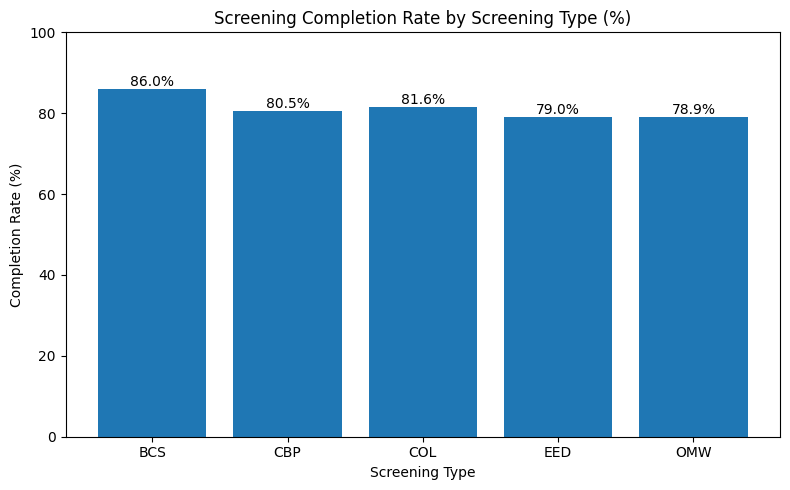

In [77]:
import matplotlib.pyplot as plt

# Calculate completion rate by screening type
completion_by_type = (
    df.groupby('screening_type')['screening_completed_ind']
    .mean() * 100
)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(
    completion_by_type.index,
    completion_by_type.values
)

# Add percentage labels
for bar, value in zip(bars, completion_by_type.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{value:.1f}%",
        ha='center',
        va='bottom'
    )

plt.title("Screening Completion Rate by Screening Type (%)")
plt.xlabel("Screening Type")
plt.ylabel("Completion Rate (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [45]:
# Calculate completion rate by screening type
completion_by_type = (
    df.groupby('screening_type')['screening_completed_ind']
    .mean() * 100
)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   patient_id               1987 non-null   object        
 1   screening_type           1987 non-null   object        
 2   screening_completed_ind  1369 non-null   float64       
 3   latest_call_date         1739 non-null   datetime64[ns]
 4   reached_ind              1739 non-null   float64       
 5   screening_date           1379 non-null   datetime64[ns]
 6   num_eligible_screenings  1987 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 108.8+ KB


In [79]:
gd=df.head()

In [80]:
gd.T

,0,1,2,3,4
patient_id,7229306339735196262022,7229306339735196262022,7229306339735196262022,7229306339735196262022,7229306339735196262022
screening_type,CBP,CBP,CBP,CBP,CBP
screening_completed_ind,1.0,1.0,1.0,1.0,1.0
latest_call_date,2024-09-12 00:00:00,2024-09-12 00:00:00,2024-09-12 00:00:00,2024-09-12 00:00:00,2024-09-12 00:00:00
reached_ind,0.0,0.0,0.0,0.0,0.0
screening_date,2024-12-12 00:00:00,2024-09-21 00:00:00,2024-10-22 00:00:00,2024-10-01 00:00:00,2024-12-12 00:00:00
num_eligible_screenings,64,64,64,64,64


In [81]:
df.head()

,patient_id,screening_type,screening_completed_ind,latest_call_date,reached_ind,screening_date,num_eligible_screenings
0,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-12-12,64
1,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-09-21,64
2,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-10-22,64
3,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-10-01,64
4,7229306339735196262022,CBP,1.0,2024-09-12,0.0,2024-12-12,64


In [50]:
df['latest_call_date'] = pd.to_datetime(df['latest_call_date'], errors='coerce')
df['screening_date'] = pd.to_datetime(df['screening_date'], errors='coerce')


In [51]:
df['screening_completed_ind'] = df['screening_completed_ind'].astype('category')
df['reached_ind'] = df['reached_ind'].astype('category')


In [52]:
df['screening_type'].value_counts(normalize=True) * 100


screening_type
COL    42.174132
CBP    21.187720
BCS    18.067438
EED    17.060896
OMW     1.509814
Name: proportion, dtype: float64

In [58]:
# Export the entire dataframe to 'full_data.csv'
df.to_csv('C:\\Users\\harag\\OneDrive\\Desktop\\Bloosomy Academy Data analytics Felloship\\DA_outbound_call_nursing_team.csv', index=False)


In [53]:
completion_counts = df['screening_completed_ind'].value_counts(dropna=False)
completion_percent = completion_counts / len(df) * 100
completion_percent


screening_completed_ind
 1.0    56.366381
NaN     31.102164
 0.0    12.531454
Name: count, dtype: float64